In [92]:
from __future__ import division
import matplotlib.pyplot as plt
import scipy.fft as sp 
from scipy.fft import fft, fftfreq, fftshift
from math import pi as PI
import math
import cmath
import numpy as np
from scipy import signal
import random as rand
from scipy.fftpack import fft, ifft


class FuncParams:
    def __init__(self, from_, to, ampl, omega, shift, N):
        self.From = from_
        self.To = to
        self.Ampl = ampl
        self.Omega = omega
        self.shift = shift
        self.N = N

class Function :
    x = []
    y = []
    
    def __init__(self, FuncParams):
      
       self.From = FuncParams.From
       self.To = FuncParams.To
       self.W = FuncParams.Omega
       self.N = FuncParams.N
       self.Shift = FuncParams.shift
       self.Ampl = FuncParams.Ampl

    def reset_x(self):
       # self.x.clear()
         self.x = np.linspace(self.From, self.To, self.N)

    def calc(self, func, *args, **func_args):
        self.reset_x()
        #for key, val in func_args.items():
         #   print(key, val)
        
        self.y = self.Ampl*func(self.W*(self.x+self.Shift), *args, **func_args)
    def plot(self):
        fig = plt.figure()
        subplot = fig.add_subplot(111)
        subplot.plot(self.x, self.y, 'b', marker='.')
               
        fig.show()

    def normalize(self, value):
        len_ = len(self.y)
        for i in range (0, len_):
            self.y[i] = self.y[i]/value

    def noize(self, intensity, level):
        if intensity >=0:
            increment = 1/intensity
            len_ = len(self.y)
            x = 0
            for i in range(0, len_):
                x+=increment
                if(x>=1):
                    x=0
                    self.y[i] += rand.uniform(-level, +level)

    def FFT(self):
        fft_lib_res = np.fft.fft(self.y)
        spacing_period = (self.From-self.To)/self.N

        xf = fftfreq(self.N, spacing_period)
        return [fftshift(xf), fftshift(fft_lib_res)]

    def IFFT(self):
        ifft_y = np.fft.ifft(self.y)
        #spacing_period = (self.From-self.To)/self.N

        ifft_x = np.linspace(self.From, self.To, len(ifft_y))
        return [ifft_x, ifft_y]
        
    

  

    

def normalize(y, val):
    for i in range(0, len(y)):
        y[i] = y[i]/val
    return y 

def get_module(y):
    res = []
    for i in range(len(y)):
        res.append(abs(y[i]))
    return res


def plot_y(y, title, From = 0, To = 0):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    if(From != 0 or To != 0):
        x = np.linspace(From, To, len(y))
        sp.plot(x,y)
    else:
        sp.plot(y)
    fig.show()


def IFFT(x, y, from_, to_):
    ifft_y = np.fft.ifft(y)
    #spacing_period = (self.From-self.To)/self.N
    ifft_x = np.linspace(from_, to_, len(ifft_y))
    return [ifft_x, ifft_y]


def FFT(x, y, from_, to_, N):
    fft_lib_res = np.fft.fft(y)
    spacing_period = (from_ - to_ / N)

    xf = fftfreq(N, spacing_period)
    return [fftshift(xf), fftshift(fft_lib_res)]


def get_points_numb(t_from, t_to, dt):
    return int((t_to - t_from) / dt)


def get_sample_rate(pts_numb, t_from, t_to):
    return int(pts_numb / (t_to - t_from))


def step(x, *args, **kwargs):
    step_from_, step_to_ = args # откуда до куда будут ненулевые значения
                                               # + область определения функции
    print(step_from_, step_to_)
    samples_num = len(x)
    print(samples_num)
    numb_of_pts_within = 0
    
    for x_ in x:
        if step_from_<=x_<=step_to_:
            numb_of_pts_within+=1 # колво точек попадающих в область ступеньки
    
    step_height = 1/numb_of_pts_within
    y = []
    for i in range(0, len(x)):
        if step_from_<=x[i]<=step_to_:
            y.append(step_height)
        else:
            y.append(0)
        
    return y

def adjust_filter(y):
    print('len x = ', len(x))
    #x = change_halves(x, len(x)%2 == 0)
    y = change_halves(y, len(y)%2 == 0)
    return y

def mirror_func(x, y):
    x_ = list(x)
    x_ = np.flip(x)
    x_ = [-i for i in x_]
    x_ = np.concatenate([x_, x])
    
    y_ = list(y)
    y_ = np.flip(y_)
    y_  = np.concatenate([y_, y])
    return [x_, y_]

def change_halves(x, is_even):
    x_ = []
    if(is_even):
        x_ = x[len(x)//2 : ]
        print('len half x = ', len(x_))
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    else:
        x_ = x[len(x)//2 : ]
        x_ = np.concatenate([x_, x[ : len(x)//2 - 1]])
    return x_

def plot(x, y, title):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    sp.plot(x, y)
    fig.show()
    
    






<ipython-input-92-e6b1c190fc1f>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-92-e6b1c190fc1f>:191: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-93-6e41643adf3b>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


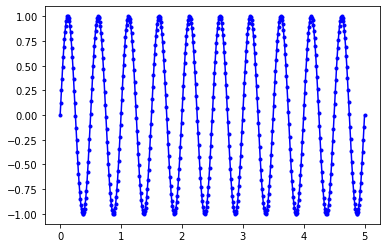

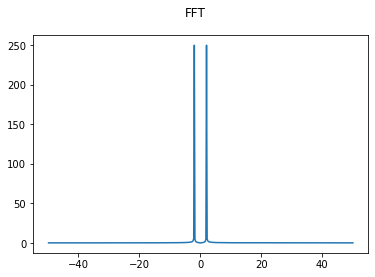

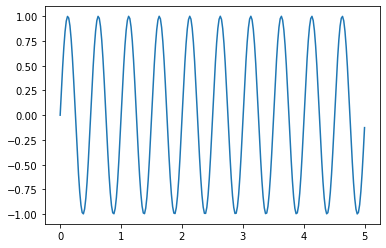

In [93]:
#sin
f=2
t_from = 0
t_to = 5
dt = 0.01

points_numb_func = get_points_numb(t_from, t_to, dt)


sin_Func = Function((FuncParams(t_from, t_to, 1, 1, 0, points_numb_func)))
sin_Func.reset_x()
sin_Func.y = np.sin(2*np.pi*f * sin_Func.x)
sin_Func.plot()

[x_fft, y_fft] = sin_Func.FFT()
plot(x_fft, get_module(y_fft), 'FFT')

x_fft_cut = x_fft[len(x_fft)//2 :]
y_fft_cut = y_fft[len(y_fft)//2 :]
[x_ifft, y_ifft] = IFFT(x_fft_cut, y_fft_cut, sin_Func.From, sin_Func.To)
#
fig = plt.figure()
sp = fig.add_subplot(111)
sp.plot(x_ifft, y_ifft)
fig.show()


0 1
500
(0.002+0j)
len x =  250
len half x =  250

 (0.002+0j)


<ipython-input-92-e6b1c190fc1f>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-92-e6b1c190fc1f>:191: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-92-e6b1c190fc1f>:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the f

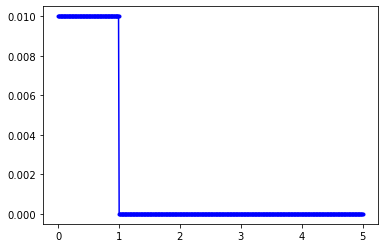

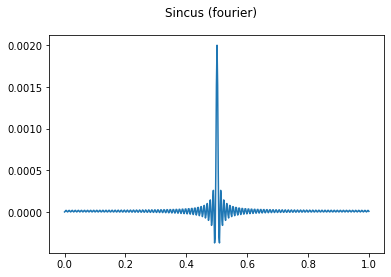

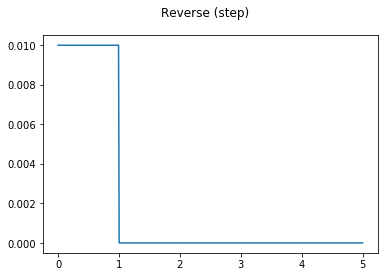

In [94]:
# обратное фурье от ступеньки

freq_from = 0
freq_to = 5
df = 0.01
N_pts = get_points_numb(freq_from, freq_to, df)


Step_Func = Function((FuncParams(freq_from, freq_to, 1, 1, 0, N_pts)))
Step_Func.calc(step, 0,1)
Step_Func.plot()


[x_ifft, y_ifft] = IFFT(Step_Func.x, Step_Func.y, 0, 1)

     
# Поменять половинки местами
print(y_ifft[0])
y_ifft_adj = adjust_filter(y_ifft)
print('\n', y_ifft[0])
plot(x_ifft, y_ifft_adj, 'Sincus (fourier)')

# Обратное преобразование в ступень
y_fft = np.fft.fft(y_ifft)
plot_y(y_fft, 'Reverse (step)', From = freq_from, To = freq_to)


2 3
500
len x =  250
len half x =  250


<ipython-input-92-e6b1c190fc1f>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-92-e6b1c190fc1f>:191: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\79137\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-92-e6b1c190fc1f>:191: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the f

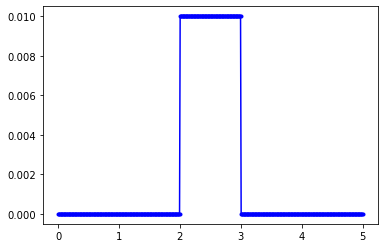

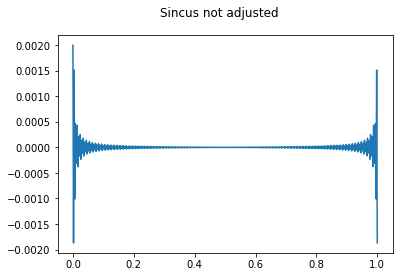

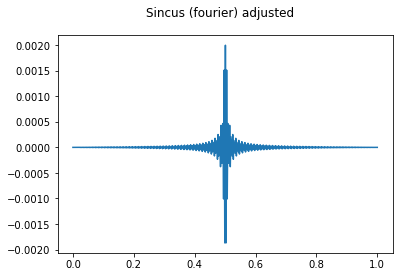

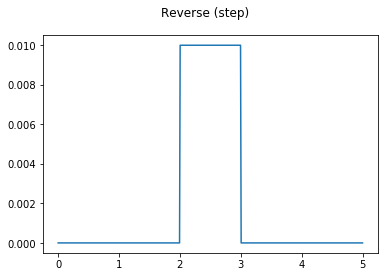

In [96]:
# Преобразование от другой ступеньки

# обратное фурье от ступеньки

freq_from = 0
freq_to = 5
df = 0.01
N_pts = get_points_numb(freq_from, freq_to, df)


Step_Func = Function((FuncParams(freq_from, freq_to, 1, 1, 0, N_pts)))
Step_Func.calc(step, 2,3)
Step_Func.plot()


[x_ifft, y_ifft] = IFFT(Step_Func.x, Step_Func.y, 0, 1)
plot(x_ifft, y_ifft, 'Sincus not adjusted')
     
# Поменять половинки местами

y_ifft_adj = adjust_filter(y_ifft)
plot(x_ifft, y_ifft_adj, 'Sincus (fourier) adjusted')

# Обратное преобразование в ступень
y_fft = np.fft.fft(y_ifft)
plot_y(y_fft, 'Reverse (step)', From = freq_from, To = freq_to)


# Пытаемся свернуть, убрать частоты

